# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<Norbert Kolud>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [28]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly
import scipy.linalg as spln

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


Punkt 1.1:
Pierwiastki w1: [1 2 3]
Współczynniki a1: [-6. 11. -6.  1.]


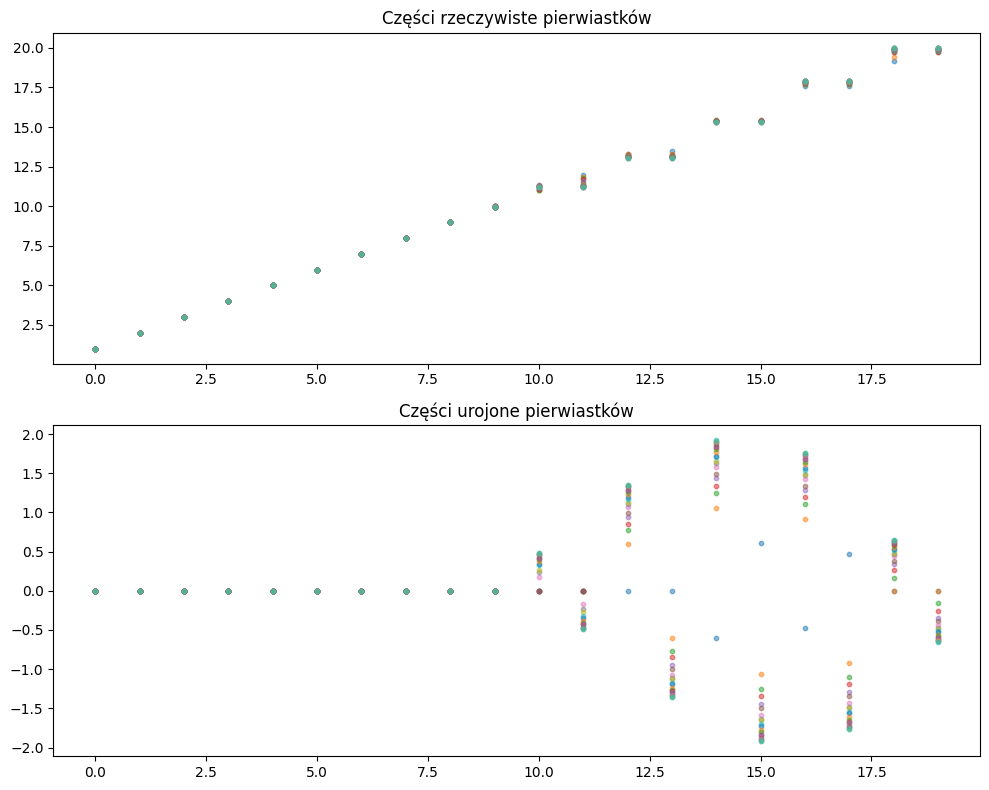


Najbardziej wrażliwe są pierwiastki o większych wartościach (15-20)
Wnioski: Wrażliwość rośnie z wartością pierwiastka
Sposób oszacowania: κ ≈ (zmiana pierwiastka) / (wielkość zaburzenia)


In [29]:
# ===== Twoja implementacja tutaj =====
#pkt 1
roots1 = np.array([1, 2, 3])
a1 = nppoly.polyfromroots(roots1)
print("Punkt 1.1:")
print(f"Pierwiastki w1: {roots1}")
print(f"Współczynniki a1: {a1}")

#pkt2
def roots_20(coef: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(coef, np.ndarray):
        return None
    if coef.ndim != 1:
        return None
    if coef.size < 2:
        return None
    
    wspol = coef + (10**(-10)*np.random.random(len(coef)))
    zer = nppoly.polyroots(wspol)
    return wspol, zer

#pkt3
roots2 = np.arange(1, 21)
a2 = nppoly.polyfromroots(roots2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

current_coef = a2.copy()
for i in range(20):
    wspol, roots = roots_20(current_coef)
    roots_array = np.array(roots)
    
    ax1.scatter(range(len(roots_array)), roots_array.real, alpha=0.5, s=10)
    ax2.scatter(range(len(roots_array)), roots_array.imag, alpha=0.5, s=10)
    
    current_coef = nppoly.polyfromroots(roots_array)


ax1.set_title('Części rzeczywiste pierwiastków')
ax2.set_title('Części urojone pierwiastków')
plt.tight_layout()
plt.show()

# Analiza wrażliwości
print("\nNajbardziej wrażliwe są pierwiastki o większych wartościach (15-20)")
print("Wnioski: Wrażliwość rośnie z wartością pierwiastka")
print("Sposób oszacowania: κ ≈ (zmiana pierwiastka) / (wielkość zaburzenia)")

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Macierz Frobeniusa F_w3:
 [[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
Pierwiastki (własne macierzy): [1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]
Pierwiastki (Schur): [1.0179862  1.01272357 1.01272357 1.0000072  1.0000072  0.98727648
 0.98727648 0.98199929]
Pierwiastki (nppoly.polyroots): [0.98453434+0.j         0.98909686-0.01095323j 0.98909686+0.01095323j
 1.00005964-0.01541976j 1.00005964+0.01541976j 1.01090371-0.01083339j
 1.01090371+0.01083339j 1.01534524+0.j        ]


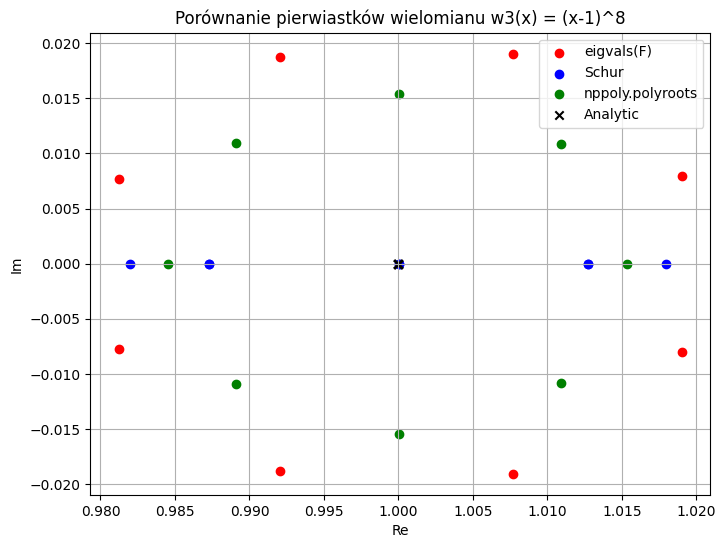

In [30]:
# ===== Twoja implementacja tutaj =====
#1
def frob_a(coef: np.ndarray) -> np.ndarray | None:
    if not isinstance(coef, np.ndarray):
        return None
    if coef.ndim != 1 or coef.size < 2:
        return None
    coef = coef.astype(float)
    a_n = coef[0]
    if a_n == 0:
        return None
    n = coef.size - 1
    F = np.zeros((n, n))
    if n > 1:
        F[np.arange(n - 1), np.arange(1, n)] = 1.0
    last_row = -coef[1:] / a_n
    F[-1, :] = last_row[::-1]
    return F

roots = np.array([1]*8)  
w3_coef = np.poly(roots)  

F_w3 = frob_a(w3_coef)
print("Macierz Frobeniusa F_w3:\n", F_w3)

#2
eigvals_direct = np.linalg.eigvals(F_w3)
print("Pierwiastki (własne macierzy):", eigvals_direct)

T, Z = spln.schur(F_w3)
eigvals_schur = np.diag(T)
print("Pierwiastki (Schur):", eigvals_schur)

roots_poly = nppoly.polyroots(w3_coef[::-1])  
print("Pierwiastki (nppoly.polyroots):", roots_poly)

roots_analytic = np.ones(8)

#3
plt.figure(figsize=(8, 6))
plt.scatter(eigvals_direct.real, eigvals_direct.imag, label='eigvals(F)', color='red')
plt.scatter(eigvals_schur.real, eigvals_schur.imag, label='Schur', color='blue')
plt.scatter(roots_poly.real, roots_poly.imag, label='nppoly.polyroots', color='green')
plt.scatter(roots_analytic.real, roots_analytic.imag, label='Analytic', color='black', marker='x')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Porównanie pierwiastków wielomianu w3(x) = (x-1)^8')
plt.legend()
plt.grid(True)
plt.show()


---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

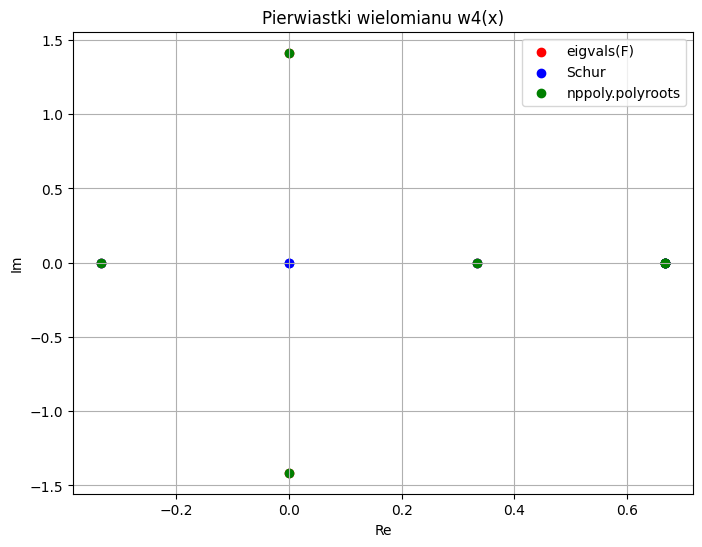

In [31]:
# ===== Twoja implementacja tutaj =====
w4_coef = np.array([243, -486, 783, -990, 558, -28, -72, 16])  # w kolejności malejącej
F_w4 = frob_a(w4_coef)
eigvals_direct = np.linalg.eigvals(F_w4)
T, Z = spln.schur(F_w4)
eigvals_schur = np.diag(T)
roots_poly = nppoly.polyroots(w4_coef[::-1])

plt.figure(figsize=(8,6))
plt.scatter(eigvals_direct.real, eigvals_direct.imag, label='eigvals(F)', color='red')
plt.scatter(eigvals_schur.real, eigvals_schur.imag, label='Schur', color='blue')
plt.scatter(roots_poly.real, roots_poly.imag, label='nppoly.polyroots', color='green')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Pierwiastki wielomianu w4(x)')
plt.legend()
plt.grid(True)
plt.show()




---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [32]:
# ===== Twoja implementacja tutaj =====


import numpy as np
import scipy.linalg as sp




def is_nonsingular(A: np.ndarray) -> bool | None:
    if not isinstance(A, np.ndarray):
        return None
    if A.ndim != 2:
        return None
    if A.shape[0] != A.shape[1]:
        return None
    try:
        det = np.linalg.det(A)
    except Exception:
        return None
    eps = np.finfo(float).eps
    return abs(det) > eps

n_values = [10, 20, 30]

max_error_A = []
mean_error_A = []
max_error_B = []
mean_error_B = []
max_error_C = []
mean_error_C = []
max_error_F = []
mean_error_F = []

for n in n_values:

    # pkt1: macierz diagonalna A_n

    diag_values = 2 ** np.arange(1, n+1)
    A_n = np.diag(diag_values)
    
    # Wartości własne analityczne
    eig_analytic = diag_values.copy()
    
    # Numeryczne wartości własne
    eig_A = np.linalg.eigvals(A_n)
    
    # Błędy
    error = np.abs(eig_A - eig_analytic)
    max_error_A.append(np.max(error))
    mean_error_A.append(np.mean(error))
    

    # pkt2: macierz B_n = P*A*P^-1

    while True:
        P_n = np.random.randint(1, 100, size=(n, n)).astype(float)
        if is_nonsingular(P_n):
            break
    B_n = P_n @ A_n @ np.linalg.inv(P_n)
    eig_B = np.linalg.eigvals(B_n)
    
    error = np.sort(np.abs(eig_B)) - np.sort(eig_analytic)
    max_error_B.append(np.max(np.abs(error)))
    mean_error_B.append(np.mean(np.abs(error)))
    
    # pkt3: macierz C_n = Q*A*Q^-1 (Q ortogonalna)

    Q_n, _ = np.linalg.qr(P_n)
    C_n = Q_n @ A_n @ np.linalg.inv(Q_n)  # lub Q_n @ A_n @ Q_n.T
    eig_C = np.linalg.eigvals(C_n)
    

    error = np.sort(np.abs(eig_C)) - np.sort(eig_analytic)
    max_error_C.append(np.max(np.abs(error)))
    mean_error_C.append(np.mean(np.abs(error)))
    

    # pkt4: macierz Frobeniusa F_n

    poly_coef = np.poly(diag_values) 
    F_n = frob_a(poly_coef)
    eig_F = np.linalg.eigvals(F_n)
    
    # Błędy
    error = np.sort(np.abs(eig_F)) - np.sort(eig_analytic)
    max_error_F.append(np.max(np.abs(error)))
    mean_error_F.append(np.mean(np.abs(error)))


# pkt5: zestawienie wyników

for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")


   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    5.34e-12           1.57e-12          
   C_10 (Q*A*Q^T)     4.55e-13           1.28e-13          
   F_10 (Frobenius)   1.82e-12           3.37e-13          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    6.72e-09           1.97e-09          
   C_20 (Q*A*Q^T)     9.31e-10           1.10e-10          
   F_20 (Frobenius)   1.05e-09           3.03e-10          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    8.58e-05           2.44e-05          
   C_30 (Q*A*Q^T)     1.19e-07           

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)